In [8]:
#Sangeeths Chandrakumar
#2023-09-26
#CDS Machine Learning
!pip install seaborn

import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
#import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import seaborn as sns

# for Q-Q plots
import scipy.stats as stats
# from feature-engine
# from feature-engine
from feature_engine.imputation import (
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer,
)

import plotly.express as px
# import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.figure_factory import create_scatterplotmatrix
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "vscode"


# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Laden der Daten

In [9]:
file_path = 'heart.csv'
heart_data = pd.read_csv(file_path)

info = heart_data.info()
head = heart_data.head()

info, head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(None,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   52    1   0       125   212    0        1      168      0      1.0      2   
 1   53    1   0       140   203    1        0      155      1      3.1      0   
 2   70    1   0       145   174    0        1      125      1      2.6      0   
 3   61    1   0       148   203    0        1      161      0      0.0      2   
 4   62    0   0       138   294    1        1      106      0      1.9      1   
 
    ca  thal  target  
 0   2     3       0  
 1   0     3       0  
 2   0     3       0  
 3   1     3       0  
 4   3     2       0  )

Der Datensatz "Herzkrankheiten" besteht aus 1025 Beobachtungen und 14 Variablen. Hier sind die Variablen im Datensatz:

age: Alter in Jahren
sex: Geschlecht (1 = männlich; 0 = weiblich)
cp: Brustschmerztyp
trestbps: Ruhender Blutdruck
chol: Cholesterinmesswert in mg/dl
fbs: Nüchterner Blutzuckerspiegel
restecg: Ruhendes Elektrokardiogramm
thalach: Maximale Herzfrequenz erreicht
exang: Angina pectoris durch Bewegung induziert
oldpeak: ST-Depression
slope: Neigung des Peak-Exercise ST-Segments
ca: Anzahl der Hauptgefäße (0-3)
thal: Thalassemie
target: Herzkrankheit (1 = ja; 0 = nein)

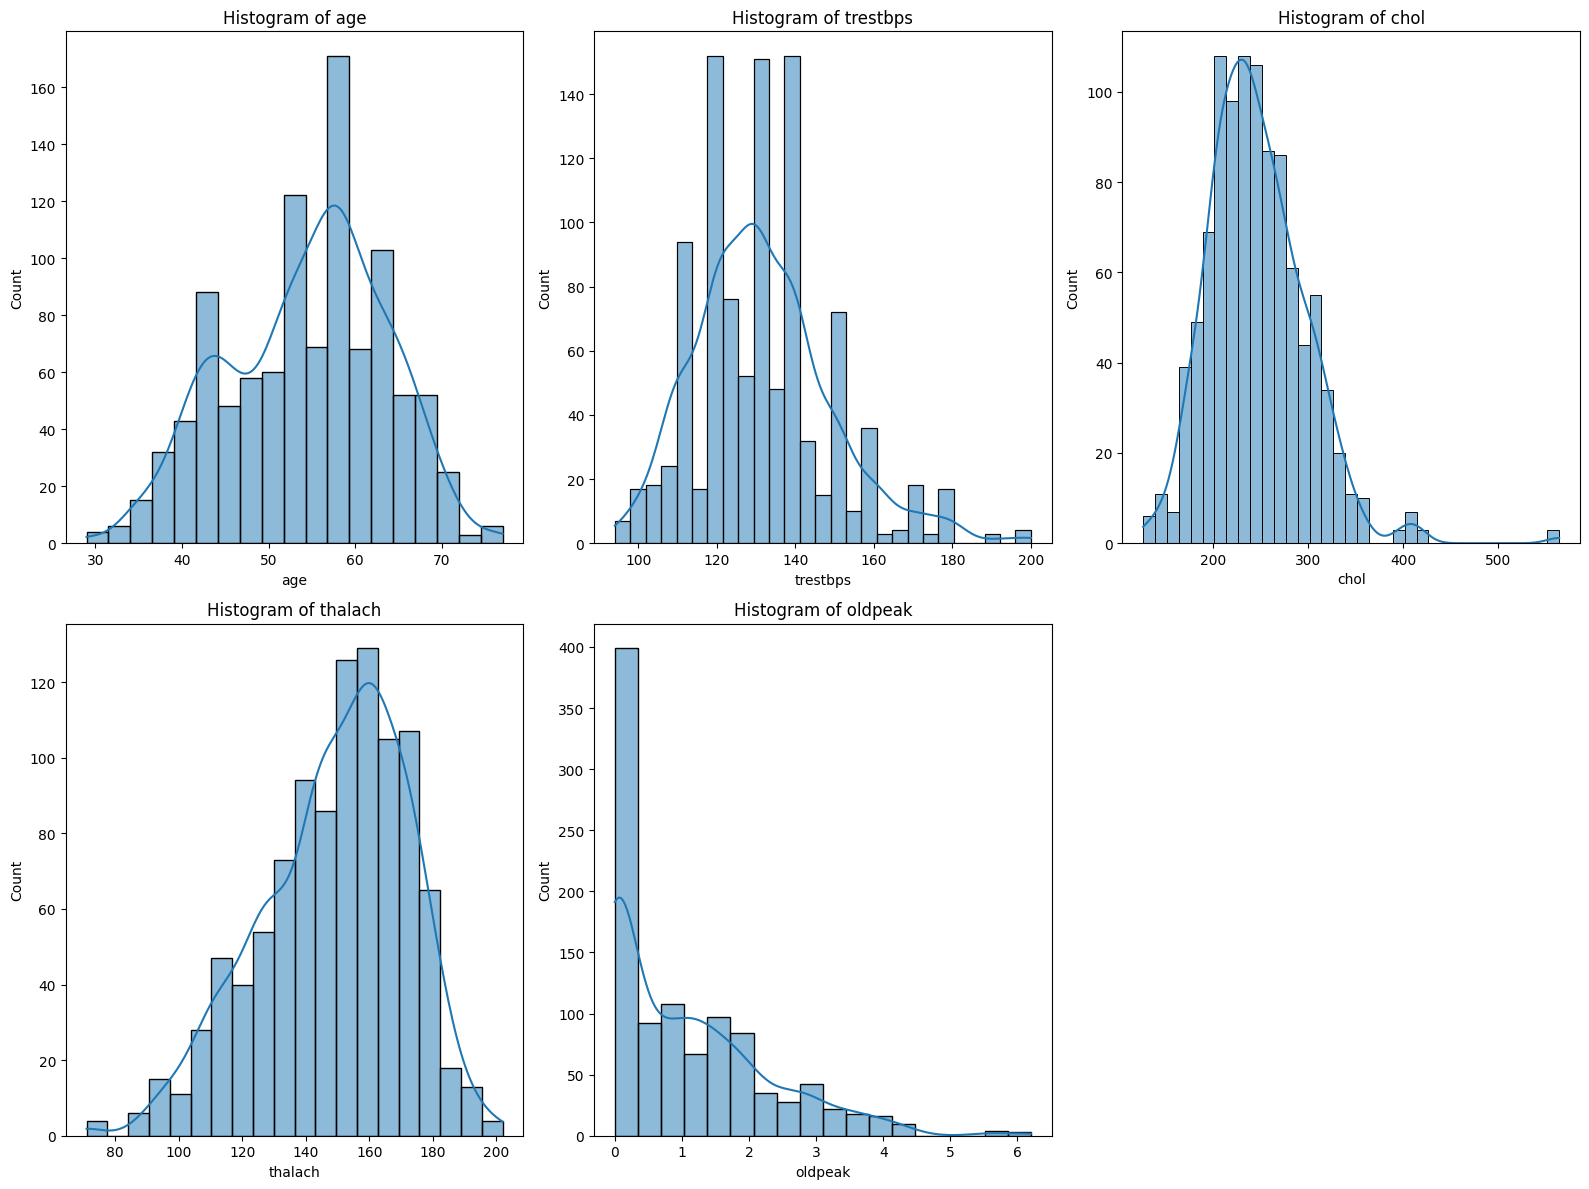

In [10]:
plt.figure(figsize=(16, 12))


continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(heart_data[var], kde=True)
    plt.title(f'Histogram of {var}')

plt.tight_layout()
plt.show()


Alter (age): Die Verteilung des Alters scheint leicht rechts schief zu sein, mit einem Peak zwischen 50 und 60 Jahren.
Ruhender Blutdruck (trestbps): Die Verteilung des ruhenden Blutdrucks ist ebenfalls leicht rechts schief.
Cholesterinmesswert (chol): Die Cholesterinwerte sind rechtsschief, mit einigen Ausreißern.
Maximale Herzfrequenz erreicht (thalach): Die maximale Herzfrequenz scheint links schief zu sein, mit einem Peak zwischen 150 und 170.
ST-Depression (oldpeak): ST-Depression ist stark rechtsschief, mit den meisten Werten nahe Null.

In [11]:
descriptive_stats = heart_data.describe(include='all').transpose()

modes = heart_data.mode().iloc[0]
descriptive_stats['mode'] = modes

variances = heart_data.var()
descriptive_stats['variance'] = variances

descriptive_stats[['count', 'mean', '50%', 'mode', 'variance', 'std', 'min', '25%', '75%', 'max']]


,count,mean,50%,mode,variance,std,min,25%,75%,max
age,1025.0,54.434146,56.0,58.0,82.306450,9.072290,29.0,48.0,61.0,77.0
sex,1025.0,0.695610,1.0,1.0,0.211944,0.460373,0.0,0.0,1.0,1.0
cp,1025.0,0.942439,1.0,0.0,1.060160,1.029641,0.0,0.0,2.0,3.0
trestbps,1025.0,131.611707,130.0,120.0,306.835410,17.516718,94.0,120.0,140.0,200.0
chol,1025.0,246.000000,240.0,204.0,2661.787109,51.592510,126.0,211.0,275.0,564.0
fbs,1025.0,0.149268,0.0,0.0,0.127111,0.356527,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,1.0,1.0,0.278655,0.527878,0.0,0.0,1.0,2.0
thalach,1025.0,149.114146,152.0,162.0,529.263325,23.005724,71.0,132.0,166.0,202.0
exang,1025.0,0.336585,0.0,0.0,0.223514,0.472772,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,0.8,0.0,1.380750,1.175053,0.0,0.0,1.8,6.2
